# Pbmc_10k, TEA - PCA MOFA MultiVI

In [1]:
import json
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

import torch
torch.cuda.is_available()

True

In [2]:
from train import Trainer
my_trainer = Trainer(config_path="./config_all.json")

# Load all datasets
original = my_trainer.load_datasets()
original

['/home/thihanh/miniconda3/envs/myenv/lib/python312.zip', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12/lib-dynload', '', '/home/thihanh/miniconda3/envs/myenv/lib/python3.12/site-packages', '/media/gambino/students_workdir/thihanh/IBP']
Loaded configuration successfully.
Datasets Detected: ['dataset_Pbmc10k', 'dataset_TEA']
Loaded configuration successfully.
Loaded configuration successfully.
Added `interval` annotation for features from /media/gambino/students_workdir/thihanh/IBP/h5mu_file/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellranger-arc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Added `interval` annotation for features from /media/gambino/students_workdir/thihanh/IBP/h5mu_file/GSM4949911_X061-AP0C1W1_leukopak_perm-cells_tea_fulldepth_cellranger-arc_filtered_feature_bc_matrix.h5
Loaded configuration successfully.
Loaded configuration successfully.


{'dataset_Pbmc10k': {'modalities': ['rna', 'atac'],
  'data': [AnnData object with n_obs × n_vars = 9578 × 2000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
       var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
       uns: 'log1p', 'hvg'
       layers: 'counts',
   AnnData object with n_obs × n_vars = 9538 × 10000
       obs: 'domain', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
       var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'lo

In [3]:
my_trainer.model_select(dataset_dict=original)


=== Concatenating dataset: dataset_Pbmc10k ===

=== Concatenating dataset: dataset_TEA ===

=== Fusing dataset as MuData object: dataset_Pbmc10k ===

=== Fusing dataset as MuData object: dataset_TEA ===
Initializing PCA Model
Loaded configuration successfully.
PCA initialized with dataset_Pbmc10k, 20 components.
Initializing MultiVI Model
Loaded configuration successfully.
Initializing MOFA+ Model
Loaded configuration successfully.
MOFA+ initialized with dataset_Pbmc10k, 20 factors to be trained with.
Initializing PCA Model
Loaded configuration successfully.
PCA initialized with dataset_TEA, 20 components.
Initializing MultiVI Model
Loaded configuration successfully.
Initializing MOFA+ Model
Loaded configuration successfully.
MOFA+ initialized with dataset_TEA, 20 factors to be trained with.


{'dataset_Pbmc10k': {'pca': <model.PCA_Model at 0x77092b1526c0>,
  'multivi': <model.MultiVI_Model at 0x770927c4b920>,
  'mofa+': <model.MOFA_Model at 0x77092b153290>},
 'dataset_TEA': {'pca': <model.PCA_Model at 0x77092b1560c0>,
  'multivi': <model.MultiVI_Model at 0x770bcab17830>,
  'mofa+': <model.MOFA_Model at 0x77092b14c320>}}

In [4]:
my_trainer.train()


=== Training for dataset_Pbmc10k ===

=== pca training ===
Using CPU mode for PCA.
Training PCA Model
Training PCA completed with 20 components
Saving PCA latent embeddings


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Latent data saved to ./outputs/pca_output/pca_dataset_Pbmc10k.h5ad

=== multivi training ===
Moving MultiVI model to cuda:1
Model successfully moved to cuda:1
Training MultiVI Model
Moving MultiVI model to cuda:1
Model successfully moved to cuda:1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Epoch 500/500: 100%|██████████| 500/500 [09:45<00:00,  1.20s/it, v_num=1, train_loss_step=1.86e+3, train_loss_epoch=1.81e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|██████████| 500/500 [09:45<00:00,  1.17s/it, v_num=1, train_loss_step=1.86e+3, train_loss_epoch=1.81e+3]
Multivi training completed.
Saving latent data
MultiVI model for dataset dataset_Pbmc10k was saved as ./outputs/multivi_output/multivis_dataset_Pbmc10k.h5ad

=== mofa+ training ===
Switching to True mode
Training MOFA+ Model

        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Latent data saved to ./outputs/pca_output/pca_dataset_TEA.h5ad

=== multivi training ===
Moving MultiVI model to cuda:1
Model successfully moved to cuda:1
Training MultiVI Model
Moving MultiVI model to cuda:1
Model successfully moved to cuda:1
Epoch 500/500: 100%|██████████| 500/500 [07:38<00:00,  1.08it/s, v_num=1, train_loss_step=1.91e+3, train_loss_epoch=1.96e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|██████████| 500/500 [07:38<00:00,  1.09it/s, v_num=1, train_loss_step=1.91e+3, train_loss_epoch=1.96e+3]
Multivi training completed.
Saving latent data
MultiVI model for dataset dataset_TEA was saved as ./outputs/multivi_output/multivis_dataset_TEA.h5ad

=== mofa+ training ===
Switching to True mode
Training MOFA+ Model

        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N

## Load latent testing

In [6]:
pca_pbmc10k = my_trainer.models["dataset_Pbmc10k"]["pca"]
pca_TEA = my_trainer.models["dataset_TEA"]["pca"]

mofa_pbmc10k = my_trainer.models["dataset_Pbmc10k"]["mofa+"]
mofa_TEA = my_trainer.models["dataset_TEA"]["mofa+"]

multivi_pbmc10k = my_trainer.models["dataset_Pbmc10k"]["multivi"]
multivi_TEA = my_trainer.models["dataset_TEA"]["multivi"]

Loading latent data from ./outputs/pca_output/pca_dataset_Pbmc10k.h5ad
Latent data loaded successfully.
Generating UMAP with PCA embeddings for all modalities


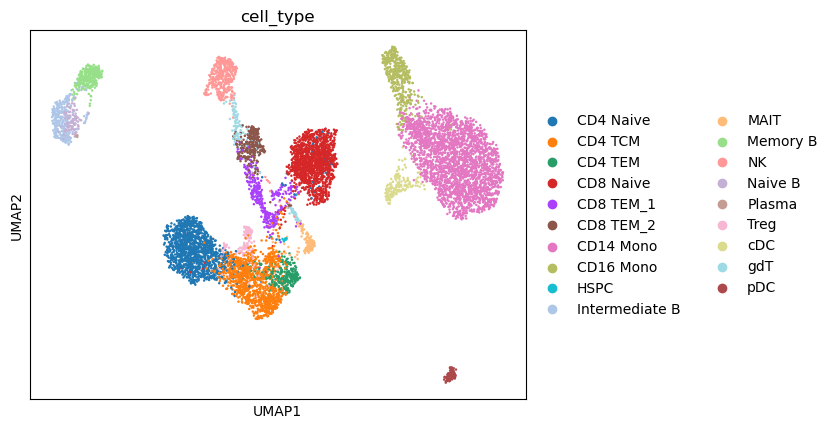

UMAP plot for pca dataset_Pbmc10k saved as _pca_dataset_Pbmc10k_plot.png


In [7]:
anndata = pca_pbmc10k.load_latent()
anndata
pca_pbmc10k.umap()

Loading latent data from ./outputs/pca_output/pca_dataset_TEA.h5ad
Latent data loaded successfully.
Generating UMAP with PCA embeddings for all modalities


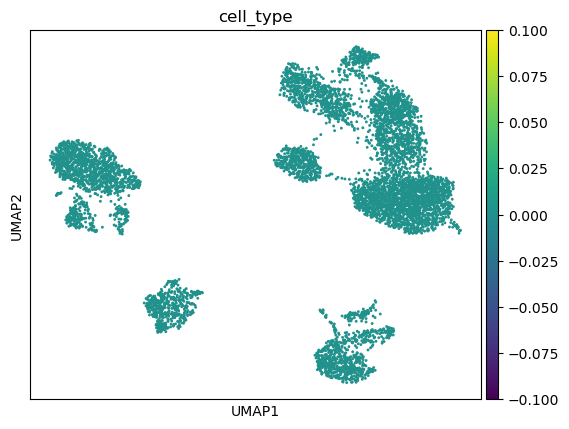

UMAP plot for pca dataset_TEA saved as _pca_dataset_TEA_plot.png


In [8]:
anndata = pca_TEA.load_latent()
anndata
pca_TEA.umap()

Loading latent data from ./outputs/mofa_output/mofa_dataset_Pbmc10k.h5ad
Latent data loaded successfully.
AnnData object with n_obs × n_vars = 9505 × 12000
    obs: 'rna:domain', 'rna:n_genes_by_counts', 'rna:log1p_n_genes_by_counts', 'rna:total_counts', 'rna:log1p_total_counts', 'rna:pct_counts_in_top_50_genes', 'rna:pct_counts_in_top_100_genes', 'rna:pct_counts_in_top_200_genes', 'rna:pct_counts_in_top_500_genes', 'rna:total_counts_mt', 'rna:log1p_total_counts_mt', 'rna:pct_counts_mt', 'atac:domain', 'atac:n_genes_by_counts', 'atac:log1p_n_genes_by_counts', 'atac:total_counts', 'atac:log1p_total_counts', 'cell_type', 'batch'
    var: 'rna:gene_ids', 'rna:mt', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'mofa'
    obsm: 'X_mofa', 'atac', 'rna'
    varm: 'LFs', 'atac', 'rna'
Generating UMAP with MOFA embeddings


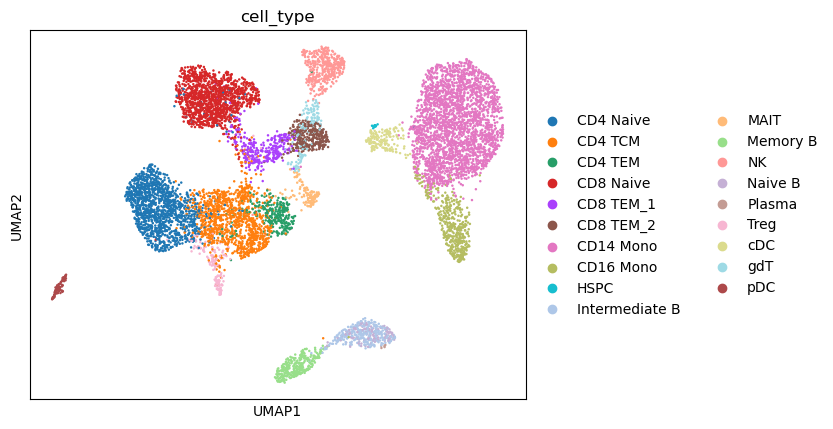

UMAP plot saved as _mofa_dataset_Pbmc10k_plot.png


In [9]:
anndata = mofa_pbmc10k.load_latent()
print(anndata)
mofa_pbmc10k.umap()

Loading latent data from ./outputs/mofa_output/mofa_dataset_TEA.h5ad
Latent data loaded successfully.
AnnData object with n_obs × n_vars = 7084 × 12046
    obs: 'rna:n_genes_by_counts', 'rna:log1p_n_genes_by_counts', 'rna:total_counts', 'rna:log1p_total_counts', 'rna:pct_counts_in_top_50_genes', 'rna:pct_counts_in_top_100_genes', 'rna:pct_counts_in_top_200_genes', 'rna:pct_counts_in_top_500_genes', 'rna:total_counts_mt', 'rna:log1p_total_counts_mt', 'rna:pct_counts_mt', 'atac:n_genes_by_counts', 'atac:log1p_n_genes_by_counts', 'atac:total_counts', 'atac:log1p_total_counts', 'cell_type', 'batch'
    var: 'rna:gene_ids', 'rna:feature_types', 'rna:genome', 'rna:interval', 'rna:mt', 'rna:n_cells_by_counts', 'rna:mean_counts', 'rna:log1p_mean_counts', 'rna:pct_dropout_by_counts', 'rna:total_counts', 'rna:log1p_total_counts', 'rna:highly_variable', 'rna:means', 'rna:dispersions', 'rna:dispersions_norm', 'atac:gene_ids', 'atac:feature_types', 'atac:genome', 'atac:interval', 'atac:n_cells_by_c

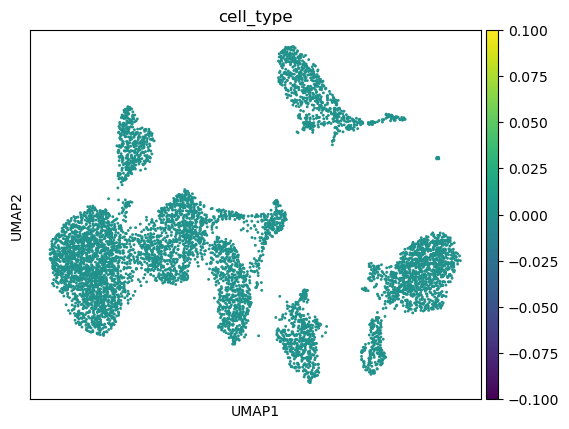

UMAP plot saved as _mofa_dataset_TEA_plot.png


In [10]:
anndata = mofa_TEA.load_latent()
print(anndata)
mofa_TEA.umap()

Loading latent data from ./outputs/multivi_output/multivis_dataset_Pbmc10k.h5ad
Latent data loaded successfully.
AnnData object with n_obs × n_vars = 9505 × 12000
    obs: 'cell_type', 'modality', '_indices', '_scvi_batch', '_scvi_labels', 'batch'
    var: 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_multivi'
    layers: 'counts'
Generating UMAP plot


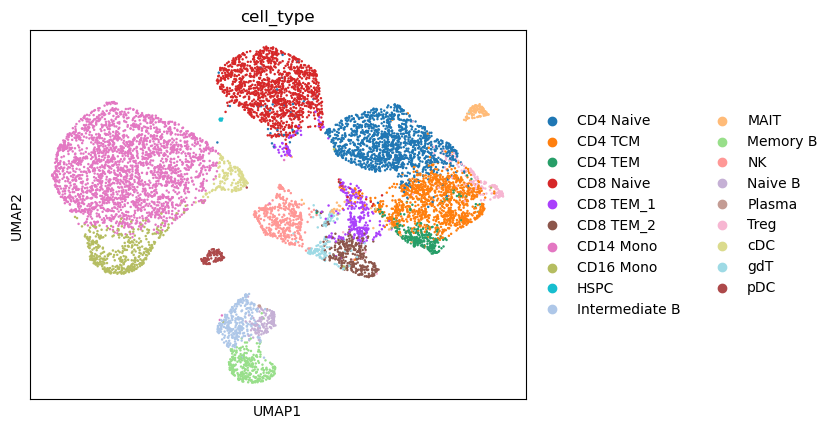

A UMAP plot for MultiVI model with dataset dataset_Pbmc10k was succesfully generated and saved as multivi_dataset_Pbmc10k_umap_plot.png


In [11]:
anndata = multivi_pbmc10k.load_latent()
print(anndata)
multivi_pbmc10k.umap()

Loading latent data from ./outputs/multivi_output/multivis_dataset_TEA.h5ad
Latent data loaded successfully.
AnnData object with n_obs × n_vars = 7084 × 12046
    obs: 'cell_type', 'modality', '_indices', '_scvi_batch', '_scvi_labels', 'batch'
    var: 'feature_types', 'genome', 'highly_variable'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_multivi'
    layers: 'counts'
Generating UMAP plot


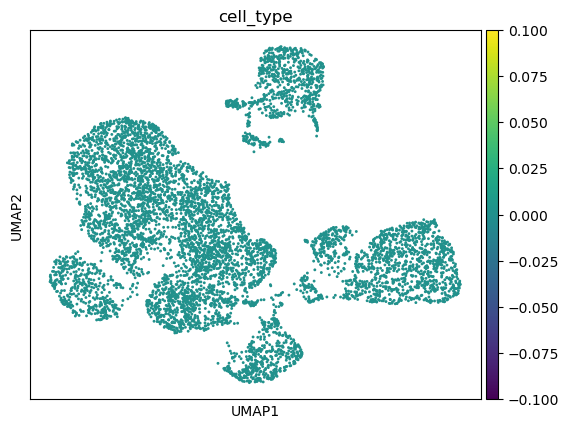

A UMAP plot for MultiVI model with dataset dataset_TEA was succesfully generated and saved as multivi_dataset_TEA_umap_plot.png


In [12]:
anndata = multivi_TEA.load_latent()
print(anndata)
multivi_TEA.umap()